In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# dataset=pd.read_excel(r"C:\Users\Mohit\Downloads\flight_price.xlsx")
# dataset.head()
# with open(r"C:\Users\Mohit\Downloads\flight_price.xlsx",'rb') as f:
#     data=f.read()
# print(data)
dataframe=pd.read_excel(r"C:\Users\Mohit\Downloads\flight_price.xlsx")
# read_file.to_csv("flight_price.csv")
# df=pd.DataFrame(pd.read_csv("flight_price.csv"))
# df
dataframe.head()
# It was in excel format so I first try to convert to csv then tried to read but we can also perform actions of pandas on excel file

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#what are the columns name in dataframe
print(dataframe.columns) # name of all columns
print(len(dataframe.columns)) # len of columns
print(dataframe.shape) # rows and columns both but in tuple


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
11
(10683, 11)


In [5]:
# dataframe summary
print(dataframe.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


In [6]:
# all stastical summayr
print("Stastical summary \n",dataframe.describe())

Stastical summary 
               Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [7]:
print(dataframe['price'.capitalize()].quantile(0.5)) # finding the 50 percentile 

8372.0


In [8]:
print(dataframe['airline'.capitalize()].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


In [9]:
#Dataset ke columns ka data type kya hai?
print(dataframe.dtypes) 
# objects means that column has strings or datatime values 


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


In [10]:
# converting object to datetime
dataframe['Date_of_Journey']=pd.to_datetime(dataframe['Date_of_Journey'])
print(dataframe.dtypes)

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object


C:\Users\Mohit\AppData\Local\Temp\ipykernel_12160\1839543511.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataframe['Date_of_Journey']=pd.to_datetime(dataframe['Date_of_Journey'])


## Plotting betwwen price and route

C:\Users\Mohit\AppData\Local\Temp\ipykernel_12160\1733683291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataframe['Route'], y=dataframe['Price'], palette="viridis")


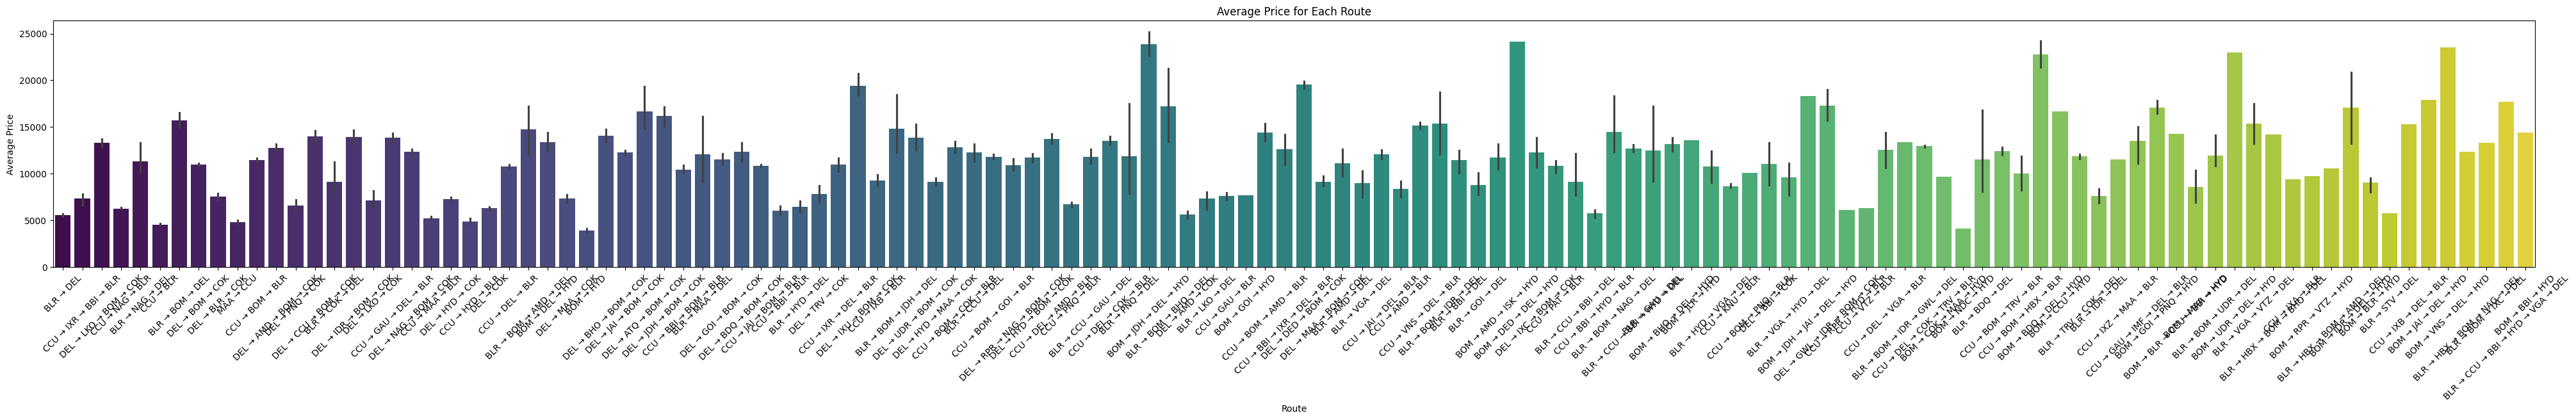

In [11]:
plt.figure(figsize=(50,5))
sns.barplot(x=dataframe['Route'], y=dataframe['Price'], palette="viridis")
plt.xlabel("Route")
plt.ylabel("Average Price")
plt.title("Average Price for Each Route")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

In [12]:
# finding how many null values
print(dataframe.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [13]:
# what is the null value percentage
null_value_column=dataframe['route'.capitalize()].isnull().sum()
# null_value_column
percentage=(dataframe['Route'].isnull().mean())*100
print(percentage)

0.009360666479453337


In [14]:
dataframe[dataframe.duplicated()].count()

Airline            220
Date_of_Journey    220
Source             220
Destination        220
Route              220
Dep_Time           220
Arrival_Time       220
Duration           220
Total_Stops        220
Additional_Info    220
Price              220
dtype: int64

In [15]:
drop_duplicated_rows=dataframe.drop_duplicates(keep='first')
drop_duplicated_rows.shape
# dropped the duplicate rows 


(10463, 11)

In [16]:
dataframe['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [17]:
mode_value=dataframe['Route'.capitalize()].mode()
mode_value

0    DEL → BOM → COK
Name: Route, dtype: object

In [18]:
# finding the null value row
null_value_row=dataframe.isna().any(axis=0)
null_value_row

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [19]:
# count all the occurences 
dataframe.value_counts() # it just works like dictionary frequency

Airline      Date_of_Journey  Source    Destination  Route                  Dep_Time  Arrival_Time  Duration  Total_Stops  Additional_Info              Price
Air India    2019-06-24       Delhi     Cochin       DEL → GOI → BOM → COK  22:00     19:15 25 Jun  21h 15m   2 stops      No info                      9181     3
Jet Airways  2019-05-09       Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 10 May  22h 55m   2 stops      In-flight meal not included  13029    3
             2019-05-18       Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 19 May  22h 55m   2 stops      In-flight meal not included  13029    3
             2019-05-09       Delhi     Cochin       DEL → AMD → BOM → COK  19:10     19:00 10 May  23h 50m   2 stops      No info                      15129    3
                                                                            23:05     04:25 11 May  29h 20m   2 stops      No info                      15129    3
                           

<Axes: xlabel='Price'>

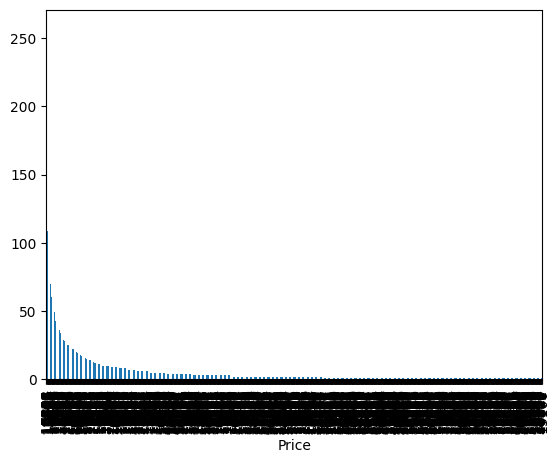

In [20]:
# flight price's distribution
dataframe.Price.value_counts().plot(kind='bar')

In [21]:
# do operations on dateofjourney
journeydate=dataframe['Date_of_Journey'] # it works like a dictionary
journeydate.value_counts()

Date_of_Journey
2019-05-18    504
2019-06-06    503
2019-05-21    497
2019-06-09    495
2019-06-12    493
2019-05-09    484
2019-03-21    423
2019-05-15    405
2019-03-06    403
2019-05-27    382
2019-06-27    355
2019-06-24    351
2019-06-01    342
2019-06-03    333
2019-06-15    328
2019-03-24    323
2019-03-03    315
2019-03-09    302
2019-03-27    299
2019-05-24    286
2019-05-06    282
2019-05-01    277
2019-05-12    259
2019-04-01    257
2019-03-01    199
2019-03-15    162
2019-03-18    156
2019-03-12    142
2019-04-09    125
2019-04-03    110
2019-06-21    109
2019-06-18    105
2019-04-06    100
2019-04-27     94
2019-04-24     92
2019-05-03     90
2019-04-15     89
2019-04-21     82
2019-04-18     67
2019-04-12     63
Name: count, dtype: int64

In [22]:
journeydate.isnull().sum() 

np.int64(0)

In [23]:
import re
s='23/04/2014'
q=re.findall(r"[0-9]+",s)
print(q)

['23', '04', '2014']


In [24]:
dataframe['Arrival_Time']=dataframe['Arrival_Time'].str[:5]
# dataframe.drop(columns=['Arrival_Time_hours','Arrival_Time_minutes'],inplace=True)
dataframe

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [25]:
# completely seperate the arrival_time
dataframe['Arrival_Time_hours']=dataframe['Arrival_Time'].str.split(":").str[0].astype(int)
dataframe['Arrival_Time_minutes']=dataframe['Arrival_Time'].str.split(":").str[1].astype(int)
dataframe


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Time_hours,Arrival_Time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,11,20
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,14,10


In [26]:
dataframe.drop(columns=['Arrival_Time'],inplace=True)
dataframe

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Time_hours,Arrival_Time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,2h 30m,non-stop,No info,4107,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,2h 35m,non-stop,No info,4145,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,3h,non-stop,No info,7229,11,20
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,2h 40m,non-stop,No info,12648,14,10


In [27]:
dataframe['Dep_Time_hours']=dataframe['Dep_Time'].str.split(':').str[0].astype(int)
dataframe['Dep_Time_minutes']=dataframe['Dep_Time'].str.split(':').str[1].astype(int)
dataframe.drop(columns=['Dep_Time'],inplace=True)
dataframe


,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_Time_hours,Arrival_Time_minutes,Dep_Time_hours,Dep_Time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,22,25,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,23,20,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,11,20,8,20
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,14,10,11,30


In [28]:
dataframe['Duration_hours']=dataframe['duration'.capitalize()].str.split(" ").str[0]
dataframe['Duration_minutes']=dataframe['duration'.capitalize()].str.split(" ").str[1]
dataframe.drop(columns=['duration'.capitalize()],inplace=True)
dataframe

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Arrival_Time_hours,Arrival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,1,10,22,20,2h,50m
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,13,15,5,50,7h,25m
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,4,25,9,25,19h,NaN
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,23,30,18,5,5h,25m
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,21,35,16,50,4h,45m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,22,25,19,55,2h,30m
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,23,20,20,45,2h,35m
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,11,20,8,20,3h,NaN
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,14,10,11,30,2h,40m


In [29]:
dataframe['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [30]:
dataframe['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [31]:
dataframe[dataframe['Additional_Info'].isnull()]  # for finding the nan value in a certain column 

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Arrival_Time_hours,Arrival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_minutes


In [32]:
dataframe['Duration_minutes'].isna().value_counts()
dataframe['Duration_minutes'].fillna(0,inplace=True) # all the nan values replaced with 0
dataframe['Duration_minutes'].isna().value_counts()

C:\Users\Mohit\AppData\Local\Temp\ipykernel_12160\3383457795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['Duration_minutes'].fillna(0,inplace=True) # all the nan values replaced with 0


Duration_minutes
False    10683
Name: count, dtype: int64

In [33]:
dataframe.shape

(10683, 14)

In [34]:
# using one hot encoding for the airline

from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
new_airline=enc.fit_transform(dataframe[['Airline','Source','Destination']]).toarray()
# pd.DataFrame(enc.fit_transform(dataframe[['Airline','Source','Destination']]).toarray(),columns=enc.get_feature_names_out())
new_data=pd.DataFrame(new_airline,columns=enc.get_feature_names_out())
new_dataframe=pd.concat([dataframe,new_data],axis=1)
new_dataframe.drop(columns=['Airline','Source','Destination'],inplace=True)
new_dataframe


,Date_of_Journey,Route,Total_Stops,Additional_Info,Price,Arrival_Time_hours,Arrival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2019-03-24,BLR → DEL,non-stop,No info,3897,1,10,22,20,2h,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2019-05-01,CCU → IXR → BBI → BLR,2 stops,No info,7662,13,15,5,50,7h,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-09,DEL → LKO → BOM → COK,2 stops,No info,13882,4,25,9,25,19h,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2019-05-12,CCU → NAG → BLR,1 stop,No info,6218,23,30,18,5,5h,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2019-03-01,BLR → NAG → DEL,1 stop,No info,13302,21,35,16,50,4h,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2019-04-09,CCU → BLR,non-stop,No info,4107,22,25,19,55,2h,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,2019-04-27,CCU → BLR,non-stop,No info,4145,23,20,20,45,2h,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,2019-04-27,BLR → DEL,non-stop,No info,7229,11,20,8,20,3h,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,2019-03-01,BLR → DEL,non-stop,No info,12648,14,10,11,30,2h,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
# new_dataframe=new_dataframe[['']]
new_dataframe.columns
new_dataframe=new_dataframe[['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy','Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi','Date_of_Journey', 'Route', 'Total_Stops', 'Additional_Info', 'Price',
       'Arrival_Time_hours', 'Arrival_Time_minutes', 'Dep_Time_hours',
       'Dep_Time_minutes', 'Duration_hours', 'Duration_minutes']]
new_dataframe
# new_dataframe.to_csv


,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Route,Total_Stops,Additional_Info,Price,Arrival_Time_hours,Arrival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_minutes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,BLR → DEL,non-stop,No info,3897,1,10,22,20,2h,50m
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,CCU → IXR → BBI → BLR,2 stops,No info,7662,13,15,5,50,7h,25m
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,DEL → LKO → BOM → COK,2 stops,No info,13882,4,25,9,25,19h,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,CCU → NAG → BLR,1 stop,No info,6218,23,30,18,5,5h,25m
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,BLR → NAG → DEL,1 stop,No info,13302,21,35,16,50,4h,45m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,CCU → BLR,non-stop,No info,4107,22,25,19,55,2h,30m
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,CCU → BLR,non-stop,No info,4145,23,20,20,45,2h,35m
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,BLR → DEL,non-stop,No info,7229,11,20,8,20,3h,0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,BLR → DEL,non-stop,No info,12648,14,10,11,30,2h,40m


In [36]:
new_dataframe.isnull().sum()

Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Banglore                              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Banglore                         0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_K

## Data Cleaning

In [37]:
new_dataframe[new_dataframe['Route'].isnull()]
#collecting the info from the google airplane websites and got to know the null value can by filled with MALAYSIA

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Route,Total_Stops,Additional_Info,Price,Arrival_Time_hours,Arrival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_minutes
9039,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,No info,7480,9,25,9,45,23h,40m


In [38]:
new_dataframe['Route']=new_dataframe['Route'].fillna('Germany')
new_dataframe.isnull().sum()

Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Banglore                              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Banglore                         0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_K

Saved
